<a href="https://colab.research.google.com/github/gomezan/inteligencia-artificial/blob/main/Copia_de_Ej_ROC_Confusion_Matrix2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
import numpy as np
from sklearn import metrics

y =      np.array([1,1,   1,   1,   1,  1,   1,     0,   0,  0,   0,  0])
#Clasificador 1:
scores = np.array([0.99,0.94,0.92,0.85,0.52,0.45,0.40,  0.55,0.5,0.22,0.1,0.01])
#Clasificador 2:
scores2 = np.array([0.99,0.94,0.92,0.85,0.7,0.55,0.46,  0.58,0.3,0.22,0.1,0.01])

fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y, scores2, pos_label=1)

print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.  0.2 0.2 0.4 0.4 1. ]
[0.         0.14285714 0.57142857 0.57142857 0.71428571 0.71428571
 1.         1.        ]
[1.99 0.99 0.85 0.55 0.52 0.5  0.4  0.01]


In [ ]:
roc_auc=metrics.roc_auc_score(y, scores)
roc_auc2=metrics.roc_auc_score(y, scores2)

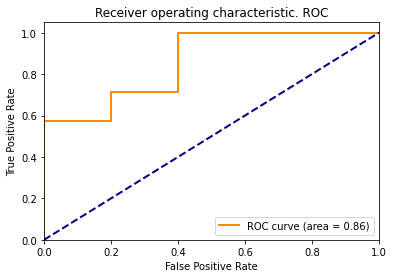

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

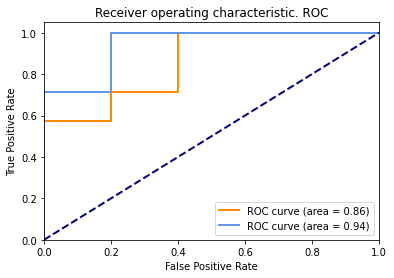

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='cornflowerblue',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

## Ejercicio en clase: 

[1 1 0 ... 0 0 1]


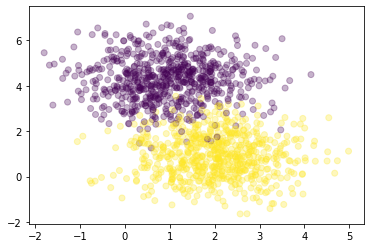

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#probar con:
#     n_samples = 1000, centers = 2, n_features=2, shuffle=True, random_state=3
#     
X, y = make_blobs(n_samples = 1000+300, centers = 2, n_features=2, shuffle=True, random_state=0)
print(y)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.3)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train)# saca la media y la desviacion estandar del conjunto de entrenamiento
X_train = scaler.transform(X_train)# uso esa media y sdev para escalizar
X_test = scaler.transform(X_test)
#si me llega un dato nuevo a ser predicho, debo escalizarlo con la media y la sdev que encontré en el donnunto de entrenamiento

range(1, 32)


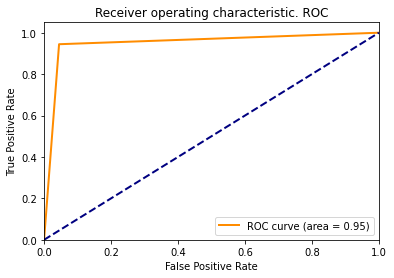

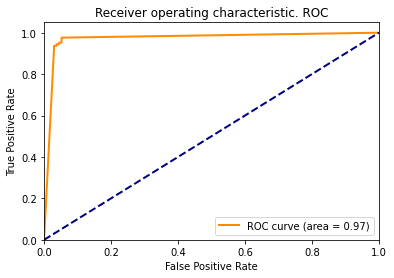

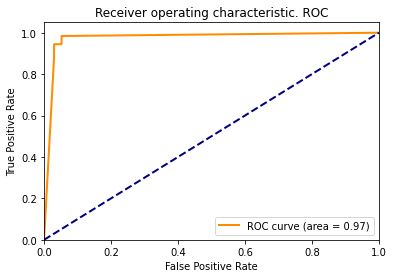

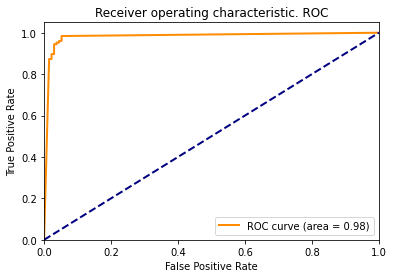

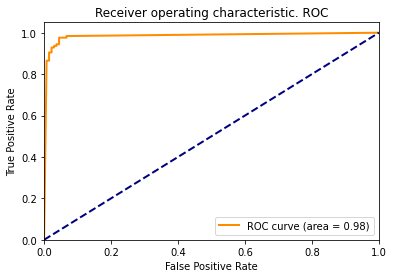

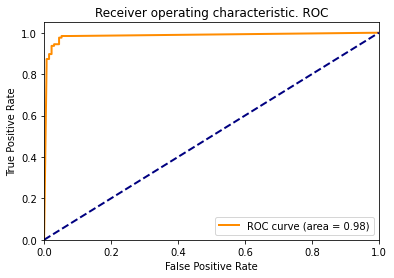

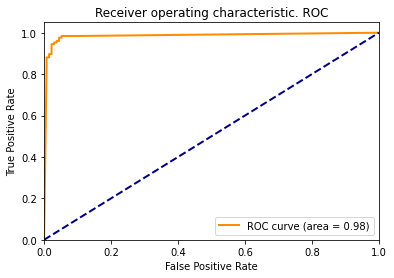

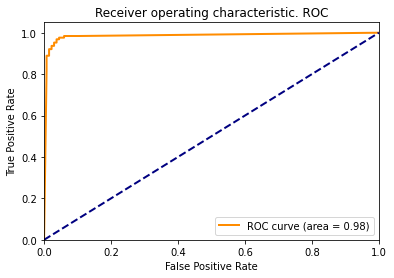

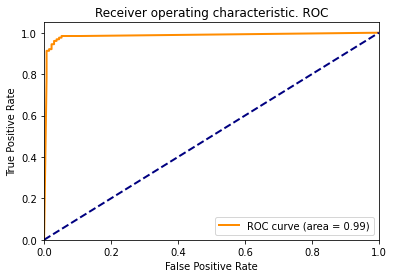

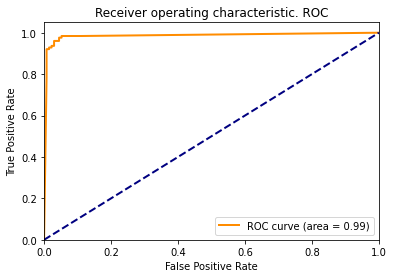

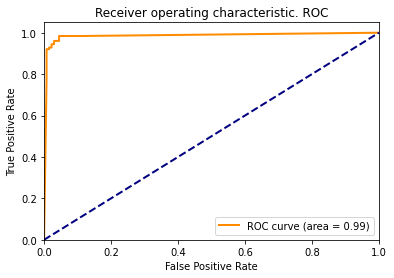

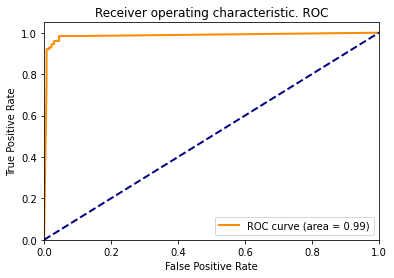

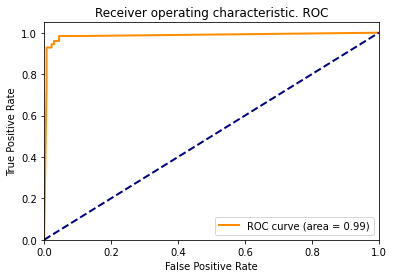

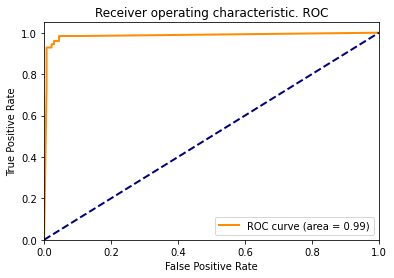

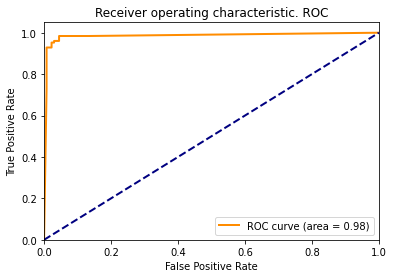

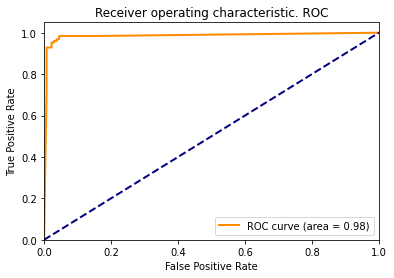

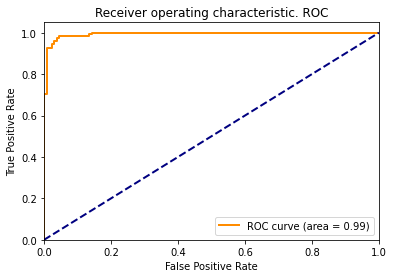

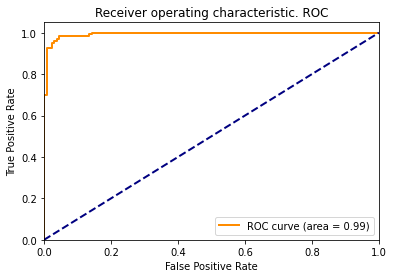

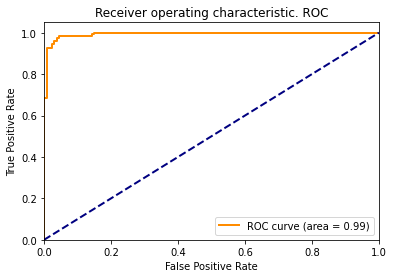

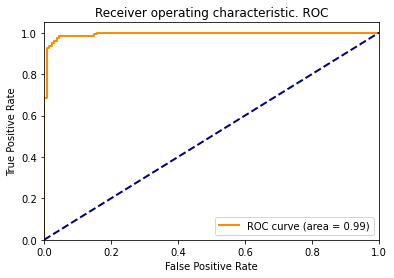

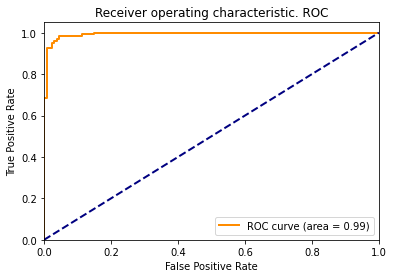

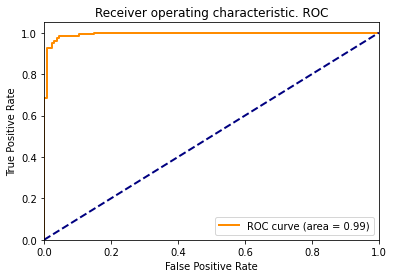

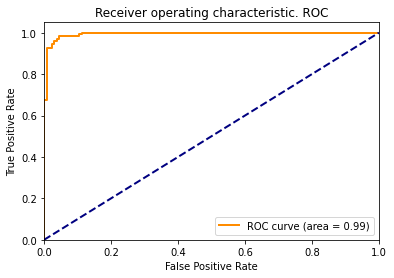

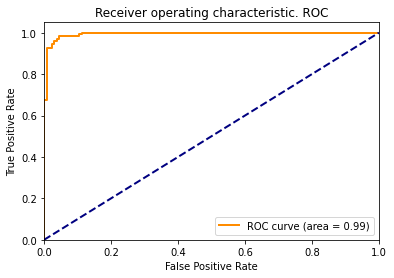

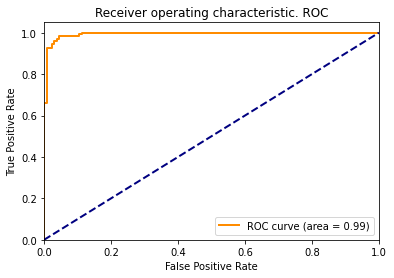

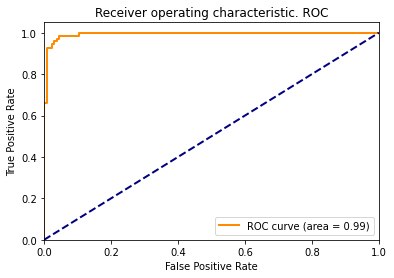

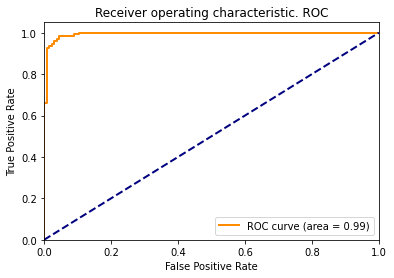

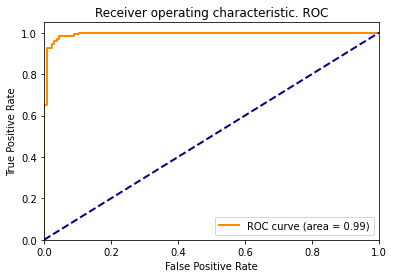

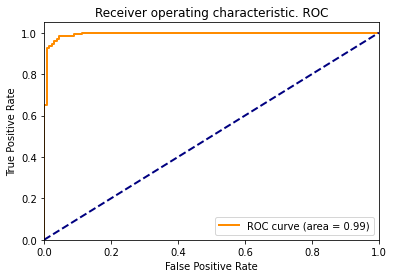

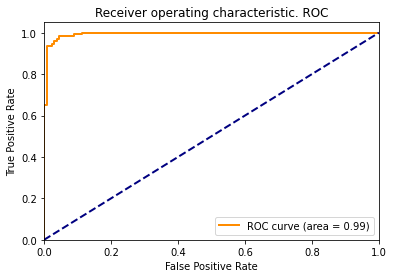

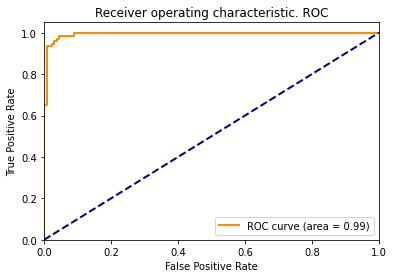

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
k_range = range(1, int(np.sqrt(len(y_train))))
print(k_range)
#por ejemplo euclidean. manhattan. chebyshev. minkowski. wminkowski. seuclidean. mahalanobis. hamming
#import sklearn
#sorted(sklearn.neighbors.VALID_METRICS['brute'])
distance='minkowski'#podemos hacer un for que recorra las distancias que queremos probar en un enfoque grid-search.

ACC=[]
MCC=[]
TPR=[]
FPR=[]
AUC=[]

for k in k_range:#por ahora variemos K, 
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance, metric_params=None,algorithm='brute')
    #knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_predicted=knn.predict(X_test)

    y_score=knn.predict_proba(X_test)
    #Les toca hacer:
    #Hallar: Accuracy
    ACC.append(knn.score(X_test, y_test))
    #MCC 
    MCC.append(matthews_corrcoef(y_test,y_predicted))
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
    #TPR
    #Ustedes buscan
    TPR.append(recall_score(y_test,y_predicted))
    #FPR esuno menos TNR no TPR
    #Ustedes buscan
    tn, fp, fn, tp = confusion_matrix(y_test,y_predicted).ravel()
    #FPR= FP/N =FP/(FP+TN)
    FPR.append(fp/(fp+tn))
    # AUC de la ROC
    #AUC.append(y_score[:, 1])
    AUC.append(roc_auc_score(y_test,y_score[:, 1]))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:, 1], pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test,y_score[:, 1]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic. ROC')
    plt.legend(loc="lower right")
    plt.show()

    
    

[0.95, 0.95, 0.95, 0.9538461538461539, 0.9538461538461539, 0.9538461538461539, 0.9576923076923077, 0.9576923076923077, 0.9576923076923077, 0.9576923076923077, 0.9576923076923077, 0.9576923076923077, 0.9576923076923077, 0.9576923076923077, 0.9653846153846154, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616]


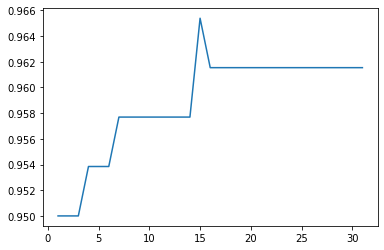

In [ ]:
print(ACC)
plt.figure()
plt.plot(k_range,ACC)
plt.show()

[0.8999082046151239, 0.8999082046151239, 0.8999082046151239, 0.9076048329779673, 0.9076687619739565, 0.9076687619739565, 0.9154888032149657, 0.9154888032149657, 0.9154888032149657, 0.9154888032149657, 0.9154888032149657, 0.9154888032149657, 0.9154888032149657, 0.9154888032149657, 0.9309030687787457, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831, 0.9230770851727831]


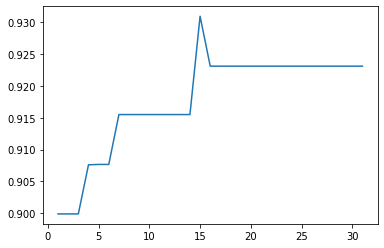

In [ ]:
print(MCC)
plt.figure()
plt.plot(k_range,MCC)
plt.show()

[0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9523809523809523, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523]


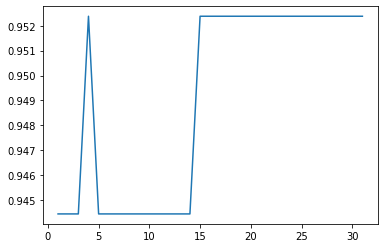

In [ ]:
print(TPR)
plt.figure()
plt.plot(k_range,TPR)
plt.show()

[0.04477611940298507, 0.04477611940298507, 0.04477611940298507, 0.04477611940298507, 0.03731343283582089, 0.03731343283582089, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.022388059701492536, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716, 0.029850746268656716]


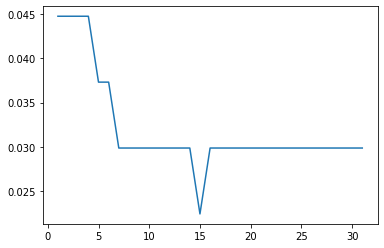

In [ ]:
print(FPR)
plt.figure()
plt.plot(k_range,FPR)
plt.show()

## Crear ROC 

[0.9498341625207297, 0.9714818763326226, 0.974532101397773, 0.9811656005685857, 0.9845415778251598, 0.9847192608386638, 0.9848673300165838, 0.9849265576877518, 0.9851042407012557, 0.9851042407012557, 0.9851930822080076, 0.9851338545368397, 0.9851338545368397, 0.9851042407012557, 0.9849561715233357, 0.9848377161809998, 0.9943733712390429, 0.9943141435678748, 0.994077232883203, 0.994077232883203, 0.994314143567875, 0.994432598910211, 0.9945510542525469, 0.9945510542525469, 0.994432598910211, 0.9944918265813788, 0.9946695095948828, 0.9945510542525468, 0.9945510542525469, 0.9946102819237148, 0.9947879649372187]


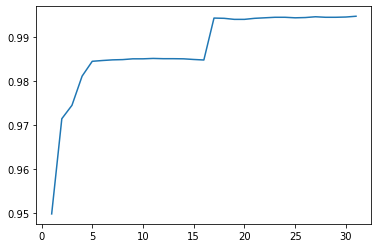

In [ ]:
print(AUC)
plt.figure()
plt.plot(k_range,AUC)
plt.show()